<a href="https://colab.research.google.com/github/emilyclifton/ML-Mushrooms/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Background:
###Introduction
Mushrooms are a diverse group of fungi that have been apart of human diets and traditional medicines for centuries. The vast array of mushroom spieces presents both culinary delights and potential dangers, with certain mushrooms being highly toxic and even lethal if consummed. In this context, the ability to accurately identify whether a mushroom is edible or poisonous becomes paramount for the health of individuals who forage for mushrooms. Hopefully, with Machine Learning Algorithms this project will enchance the accuracy and efficiency of mushroom edibility classification.
###Literature Review
Historically, the identification of edible and poisonous mushrooms has relied on traditional knowledge passed down through generations. However, the limitations of this approach have become increasingly evident, prompting researchers to explore alternative methods. Previous literature has explored various techniques, including field guides, morphological characteristics, and chemical analyses, to distiguish between edible and poisonous mushrooms. Moreover, recent advancements in machine learning have offered new possibilities for automating and imporoving the accuracy of this classification process.
###Research Gaps
Despite the progress in traditional methods and the field of machine learning, there exists a notable research gap in developing robust models for mushroom edibility classification. The challenge lies in the dataset structure, where each mushroom species is labeled as definitely edible, definitely poisonous, or of unkown edibility and not recommended. The amalgamation of the "unkown edibility" class with the "poisonous" class introduces ambiguity, making it difficult to establish clear rules for identifying poisonous mushrooms based on available signs. This research gap calls for innovative approaches to address the inherent complexities within the dataset and improve the accuracy of edibility predictions.
###Challenges
One of the primary challenges in this project is navigating the dataset's classification nuances. The absence of distinct rules for identifying poisonous mushrooms poses a unique obstacle. Machine learning models must grapple with the uncertainty associated with the "unknown edibility" class, requiring strategies to enhance classification accuracy and mitigate the risks associated with false positives or false negatives. Overcoming these challenges is crucial to developing a reliable and practical tool for mushroom enthusiasts, foragers, and researchers alike.





##Project Description:

###Project Topic
This project aims to develop a machine learning model for the accurate classification of mushroom edibility. The dataset comprises descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms within the Agaricus and Lepiota Family. The challenge lies in effectively classifying these samples as definitely edible (e), definitely poisonous (p), or of unknown edibility and not recommended (combined with poisonous).

###Methodology
Employing advanced classification algorithms, such as neural networks or decision trees, the machine learning approach takes into account detailed descriptions of hypothetical samples. Variables such as cap shape, cap color, odor, gill size, and others derived from these descriptions contribute to the model's accuracy. Special attention is given to handling the "unknown edibility" class, taking into consideration the unique characteristics of the Agaricus and Lepiota Family samples.


###Data Resources
The dataset from the UC Irvine Machine Learning Repository provides comprehensive descriptions of hypothetical samples from 23 species of gilled mushrooms. Variables such as cap shape (bell, conical, convex, flat, knobbed, sunken), cap color (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow), and others offer detailed insights into the morphological and chemical features of each mushroom species.
https://archive.ics.uci.edu/dataset/73/mushroom


###Anticipated Outcomes
The anticipated outcomes include the development of a robust machine learning model capable of accurately classifying mushrooms within the Agaricus and Lepiota Family. Performance evaluation metrics, such as precision, recall, and F1 score, will provide a comprehensive assessment of the model's effectiveness. The analysis of specific variables derived from the hypothetical samples will contribute to a nuanced understanding of the features influencing mushroom edibility.

##Performance Metrics:
| Metric | Mathematical Expression | Explanation |
| ---------- | ----------- | ----------- |
| $Accuracy$ | $= \dfrac{TP+TN}{TP+TN+FP+FN}$ | Measures the overall correctness of the model. |
| $Precision$ | $= \dfrac{TP}{TP+FP}$ | Evaluates the accuracy of positive predictions. |
| $Recall$ | $= \dfrac{TP}{TP+TN}$ | Assesses the model's ability to identify positive instances. |
| $F1$ | $= \dfrac{2\cdot Precision\cdot Recall}{Precision+Recall}$ | Provides a balanced measure that considers both false positives and false negatives. |
| $AUC-ROC$ | Area under the Receiver Operating Characteristic | Measures the model's ability to distiguish between edible and posionous. |

## Basic Exploratory Data Analysis (EDA) Questions

### 1. Distribution of Edible and Poisonous Mushrooms:
- What is the overall percentage of edible mushrooms in the dataset?
- The primary goal is to understand the overall distribution of edible and poisonous mushrooms in the dataset. This will provide insights into the balance between the two classes and set the foundation for further analysis.

### 2. Variation in Edibility Across Habitats:
- Which habitats tend to have a higher proportion of edible mushrooms?
- Exploring how the distribution of edible and poisonous mushrooms varies across different habitats can reveal potential patterns. Are certain habitats more likely to host edible mushrooms, and vice versa? This insight can contribute to safety considerations for mushroom foragers.

### 3. Effect of Odor on Edibility:
- Are there specific odors that are more commonly associated with either edible or poisonous mushrooms?
- Investigating the correlation between the odor of mushrooms and their edibility is essential. Understanding whether certain odors are associated with either edible or poisonous mushrooms provides practical information for identification in the wild.

### 4. Population and Edibility:
- Can we identify any trends or patterns in terms of population and the likelihood of mushrooms being edible?
- Analyzing the relationship between the population of mushrooms in a specific area and their edibility can offer valuable insights. Are certain population levels indicative of a higher likelihood of mushrooms being edible, or is there no discernible pattern?


## Basic Data Exploration

### Initialize workspace

In [ ]:
# install the ucimlrepo package
!pip install ucimlrepo

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# import scikit modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


### Load the Mushroom Dataset

In [ ]:
# fetch mushroom dataset from UCI repo
mushroom = fetch_ucirepo(id=73)

# load dataset into pandas df
X = mushroom.data.features
y = mushroom.data.targets

#metadata
#print(mushroom.metadata)

# variable information
print(mushroom.variables)

#print(X)

#print(y)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

### Calculations and Evaluations for EDAs

Percentage of Edible Mushrooms: 51.80%


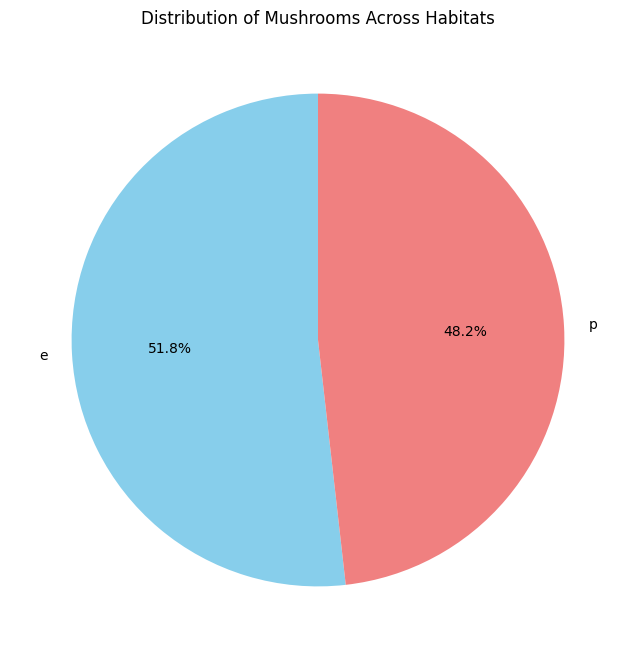

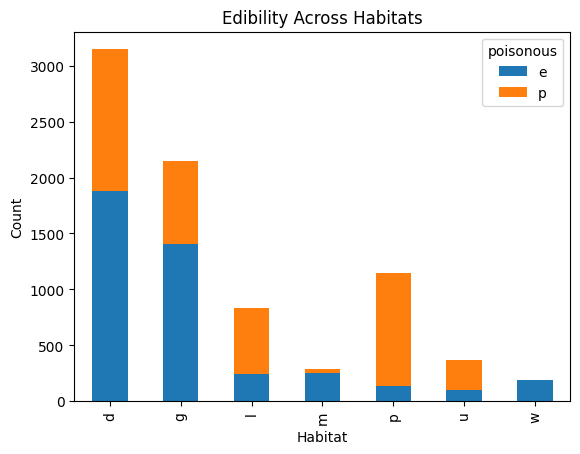

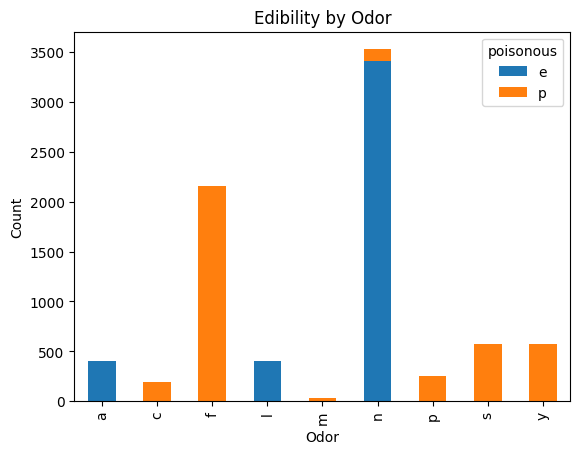

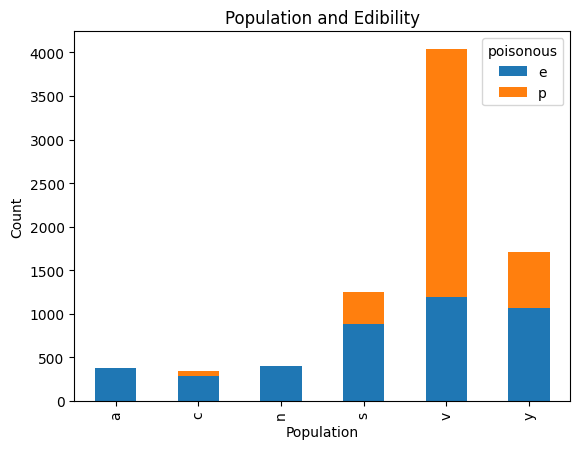

In [ ]:
# 1. Distribution of Edible and Poisonous Mushrooms
# Calculate the overall percentage of edible mushrooms
edible = y['poisonous'].value_counts()
edible_percentage = edible / len(y) * 100
print(f"Percentage of Edible Mushrooms: {edible_percentage.get('e', 0):.2f}%")

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(edible, labels=edible.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue'])
plt.title('Distribution of Mushrooms Across Habitats')

The dataset has a balanced distribution of edible and poisonous mushrooms, with approximately 51.8% being edible.

In [ ]:
# 2. Variation in Edibility Across Habitats
# Calculate the distribution of edible and poisonous mushrooms across habitats
#edibility_by_habitat = X['habitat'].value_counts().plot(kind='bar')#df.groupby(['habitat', 'class']).size().unstack().fillna(0)
y['poisonous'].groupby(X['habitat']).value_counts().unstack().plot(kind='bar', stacked=True)
#print(edibility_by_habitat)
# Plot the stacked bar chart
#edibility_by_habitat.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitats')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.show()

Waste habitats consistently have edible mushrooms, while other habitats like leaves, paths, and urban areas show a higher proportion of poisonous mushrooms. This indicates potential safety concerns in certain environments.

In [ ]:
# 3. Effect of Odor on Edibility
# Calculate the distribution of edible and poisonous mushrooms across odors
y['poisonous'].groupby(X['odor']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Edibility by Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

Mushrooms with almond or anise scents are consistently edible, while those with foul, creosote, fishy, spicy, pungent, and musty odors are predominantly poisonous. This information is crucial for identifying mushrooms based on their smell.

In [ ]:
# 4. Population and Edibility
# Calculate the distribution of edible and poisonous mushrooms across populations
y['poisonous'].groupby(X['population']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Population and Edibility')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

Mushrooms in abundant and numerous populations tend to be edible. However, other population categories show a mixed distribution of edible and poisonous mushrooms. This suggests a potential correlation between population levels and edibility.

## Feature Engineering
In light of the Basic EDA findings, the feature engineering plan includes:

- Encode categorical variables: I will apply one-hot encoding to convert categorical features into numerical format.
- Odor feature transformation: Grouping similar odors and creating binary features for commonly occurring odors that correlate with edibility.
- Simplifying population feature: Combine population categories based on edibility distribution.
- Habitat feature modification: Consider combining or reclassifying habitats to enhance feature relevance.


### Train-Test Split

Considering the dataset size and target class distribution, the train/test split will be:

- Train set: 70% of the data.
- Test set: 30% of the data.
- Golden holdout set: 10% of the data.

###Establish an Initial Pipeline
The initial pipeline will involve:

- Imputation: Handling any missing values using an imputer.
- Scaling: Applying feature scaling to ensure consistent ranges for numerical features.
- Column Transformation: Utilizing a column transformer to apply different preprocessing steps to different subsets of features.


###Model Fitting and Evaluation
Assumptions about feature importance and model performance:

1. Odor will be a significant predictor: Given its strong correlation with edibility, odor is anticipated to be a key feature for model performance.
2. Habitat may have varying importance: Differentiating between certain habitats might play a crucial role in predicting edibility.
3. Interaction effects: There might be interaction effects between certain features that contribute to accurate predictions. This will be explored during model fitting and evaluation.